## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87916544/87910968 [==============================] - 11s 0us/step


In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 20s 333ms/step - loss: 2.0140 - accuracy: 0.7401 - val_loss: 1.0249 - val_accuracy: 0.7222
Epoch 2/20
61/61 [==============================] - 18s 300ms/step - loss: 0.7547 - accuracy: 0.8785 - val_loss: 0.2171 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 18s 299ms/step - loss: 0.4645 - accuracy: 0.9149 - val_loss: 0.1363 - val_accuracy: 0.9444
Epoch 4/20
61/61 [==============================] - 18s 298ms/step - loss: 0.6390 - accuracy: 0.9021 - val_loss: 0.1251 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 18s 300ms/step - loss: 0.6016 - accuracy: 0.9190 - val_loss: 0.0513 - val_accuracy: 0.9444
Epoch 6/20
61/61 [==============================] - 18s 300ms/step - loss: 0.4437 - accuracy: 0.9329 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 18s 299ms/step

In [18]:
import matplotlib.pyplot as plt

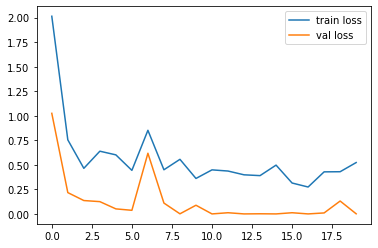

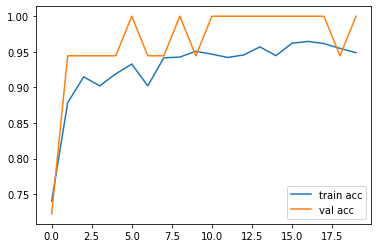

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [21]:

y_pred = model.predict(test_set)


In [22]:
y_pred

array([[9.8109645e-01, 1.8903527e-02, 3.2149321e-13, 3.6633790e-15],
       [0.0000000e+00, 1.0000000e+00, 6.7508175e-31, 9.6766906e-34],
       [1.0000000e+00, 0.0000000e+00, 5.1786687e-12, 4.6748233e-21],
       [5.8609026e-21, 3.5736174e-38, 1.0000000e+00, 6.6462439e-35],
       [7.0799731e-33, 1.0000000e+00, 2.7118872e-18, 1.2365503e-16],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.6401240e-34],
       [7.8406102e-38, 1.5452786e-03, 0.0000000e+00, 9.9845469e-01],
       [1.1753855e-34, 6.4181074e-30, 2.3469242e-26, 1.0000000e+00],
       [1.6965836e-25, 7.5243352e-23, 1.0000000e+00, 1.5732070e-17],
       [2.4483354e-23, 9.3621990e-09, 2.4969464e-17, 1.0000000e+00],
       [2.9495364e-14, 9.7012167e-14, 1.4914777e-04, 9.9985087e-01],
       [1.0000000e+00, 2.5258806e-23, 2.3514068e-17, 3.6277342e-38],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.6495063e-24, 9.0913505e-33, 1.0000000e+00, 1.4732772e-30],
       [7.5178525e-30, 3.0929136e-

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([0, 1, 0, 2, 1, 1, 3, 3, 2, 3, 3, 0, 1, 2, 2, 3, 2, 1], dtype=int64)

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
model=load_model('model_resnet50.h5')

In [39]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [11]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [12]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [13]:
x.shape

(224, 224, 3)

In [14]:
x=x/255

In [15]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [16]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [17]:
a=np.argmax(model.predict(img_data), axis=1)

In [102]:
a==1

array([ True])

In [18]:
import tensorflow as tf

In [19]:
tf.__version__

'2.2.0'